![title](https://indianapublicmedia.org/images/news-images/coronavirus-header-1920-x350.jpg)

# <center> Google Mobility Reports: quels impacts sur le comportement des Français face au Covid-19. </center>

 <center> <a href="http://www.roqueleal.me">Roque Leal</a> </center>

Cette statistique montre l'impact de l'épidémie de coronavirus sur le comportement social des Français à partir des données des Google LLC "Google COVID-19 Community Mobility Reports https://www.google.com/covid19/mobility/   05/05/2020.

Cette fois, nous allons extraire les données du rapport mondial et représenter graphiquement les tendances de chaque secteur pour découvrir des informations intéressantes sur le comportement social et l'évolution de la période de confinement sur le marché.

Deux dates importantes sont mises en évidence dans les graphiques:

1- En rouge le premier décès de COVID19 - 25/02/2020

2- En noir le début des mesures de confinement - 17/03/2020

## Configurer les modules et les packages en python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Scrapping 

In [2]:
#URL="https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
#df=pd.read_csv(URL, low_memory=False) 
df=pd.read_csv('Global_Mobility_Report.csv', low_memory=False) 

### Nettoyage et manipulation des données

In [3]:
df=df[df.country_region_code=='FR']
df['date'] =  pd.to_datetime(df['date'])
df.set_index(pd.DatetimeIndex(df['date']), inplace=True)
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,
2020-02-15,FR,France,NaN,NaN,2020-02-15,-2.0,-1.0,23.0,12.0,-2.0,-1.0
2020-02-16,FR,France,NaN,NaN,2020-02-16,6.0,2.0,9.0,7.0,-1.0,-1.0
2020-02-17,FR,France,NaN,NaN,2020-02-17,1.0,2.0,16.0,-6.0,-15.0,4.0
2020-02-18,FR,France,NaN,NaN,2020-02-18,5.0,2.0,36.0,-4.0,-14.0,3.0
2020-02-19,FR,France,NaN,NaN,2020-02-19,-4.0,-3.0,18.0,-6.0,-12.0,2.0


In [4]:
df.shape


(1064, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1064 entries, 2020-02-15 to 2020-04-30
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 1064 non-null   object        
 1   country_region                                      1064 non-null   object        
 2   sub_region_1                                        988 non-null    object        
 3   sub_region_2                                        0 non-null      object        
 4   date                                                1064 non-null   datetime64[ns]
 5   retail_and_recreation_percent_change_from_baseline  1064 non-null   float64       
 6   grocery_and_pharmacy_percent_change_from_baseline   1064 non-null   float64       
 7   parks_percent_change_from_baseline                  1064 non-null   float64   

In [6]:
df.isnull().sum()

country_region_code                                      0
country_region                                           0
sub_region_1                                            76
sub_region_2                                          1064
date                                                     0
retail_and_recreation_percent_change_from_baseline       0
grocery_and_pharmacy_percent_change_from_baseline        0
parks_percent_change_from_baseline                       0
transit_stations_percent_change_from_baseline            0
workplaces_percent_change_from_baseline                  0
residential_percent_change_from_baseline                 6
dtype: int64

In [7]:
df.drop('sub_region_2',1,inplace=True)

In [8]:
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head(63)) #The null values

           sub_region_1  residential_percent_change_from_baseline
date                                                             
2020-02-15          NaN                                      -1.0
2020-02-16          NaN                                      -1.0
2020-02-17          NaN                                       4.0
2020-02-18          NaN                                       3.0
2020-02-19          NaN                                       2.0
...                 ...                                       ...
2020-04-13          NaN                                      38.0
2020-04-14          NaN                                      31.0
2020-04-15          NaN                                      29.0
2020-04-16          NaN                                      31.0
2020-04-17          NaN                                      35.0

[63 rows x 2 columns]


In [9]:
list(df)

['country_region_code',
 'country_region',
 'sub_region_1',
 'date',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

### Sélection des données

In [10]:
df.rename(columns={'sub_region_1': 'Province',
                   'retail_and_recreation_percent_change_from_baseline': 'Retail_and_Recreation', 
                   'grocery_and_pharmacy_percent_change_from_baseline':'Grocery_and_Pharmacy', 
                   'parks_percent_change_from_baseline':'Parks',
                   'transit_stations_percent_change_from_baseline': 'Transit_Stations',
                   'workplaces_percent_change_from_baseline':'Workplaces',
                   'residential_percent_change_from_baseline': 'Residences',
                   'date':'Date'},inplace=True)

In [11]:
df=df[['Date',
 'Province',
 'Retail_and_Recreation',
 'Grocery_and_Pharmacy',
 'Parks',
 'Transit_Stations',
 'Workplaces',
 'Residences']]

In [12]:
df.Province=df.Province.replace(np.nan, 'France (General)')

In [13]:
df.Province.value_counts()

Brittany                      76
Grand Est                     76
Nouvelle-Aquitaine            76
Île-de-France                 76
Occitanie                     76
Hauts-de-France               76
Pays de la Loire              76
Auvergne-Rhône-Alpes          76
France (General)              76
Bourgogne-Franche-Comté       76
Provence-Alpes-Côte d'Azur    76
Normandy                      76
Corsica                       76
Centre-Val de Loire           76
Name: Province, dtype: int64

In [14]:
df.head()

,Date,Province,Retail_and_Recreation,Grocery_and_Pharmacy,Parks,Transit_Stations,Workplaces,Residences
date,,,,,,,,
2020-02-15,2020-02-15,France (General),-2.0,-1.0,23.0,12.0,-2.0,-1.0
2020-02-16,2020-02-16,France (General),6.0,2.0,9.0,7.0,-1.0,-1.0
2020-02-17,2020-02-17,France (General),1.0,2.0,16.0,-6.0,-15.0,4.0
2020-02-18,2020-02-18,France (General),5.0,2.0,36.0,-4.0,-14.0,3.0
2020-02-19,2020-02-19,France (General),-4.0,-3.0,18.0,-6.0,-12.0,2.0


## Nous avons classé nos dossiers selon les régions de France pour rendre notre étude plus spécifique

In [15]:
df.describe()

,Retail_and_Recreation,Grocery_and_Pharmacy,Parks,Transit_Stations,Workplaces,Residences
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1058.000000
mean,-50.704887,-23.866541,-31.775376,-47.458647,-40.782895,17.339319
std,38.864423,26.160354,38.698503,39.026491,29.017898,13.352764
min,-92.000000,-90.000000,-89.000000,-90.000000,-91.000000,-3.000000
25%,-83.000000,-43.000000,-62.000000,-80.000000,-67.000000,3.000000
50%,-78.000000,-33.000000,-50.000000,-75.000000,-53.000000,21.000000
75%,-5.000000,1.000000,3.250000,-5.000000,-7.000000,29.000000
max,25.000000,53.000000,107.000000,60.000000,5.000000,42.000000


### Nous créons notre DataFrame

In [16]:
df_FR=df[df.Province=='France (General)']

In [17]:
df_FR.describe()

,Retail_and_Recreation,Grocery_and_Pharmacy,Parks,Transit_Stations,Workplaces,Residences
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,-51.302632,-23.434211,-34.210526,-48.565789,-41.750000,17.947368
std,39.063374,25.693234,38.633773,38.193310,29.886061,13.857267
min,-91.000000,-80.000000,-82.000000,-88.000000,-89.000000,-1.000000
25%,-84.000000,-41.250000,-65.250000,-81.000000,-69.250000,3.000000
50%,-79.000000,-32.500000,-58.000000,-76.000000,-55.000000,22.500000
75%,-5.000000,1.000000,2.500000,-5.000000,-8.000000,31.000000
max,8.000000,46.000000,45.000000,14.000000,1.000000,38.000000


Nous allons maintenant découvrir la mobilité des utilisateurs en fonction des lieux qu'ils ont visités pour elle, nous allons la classer par secteurs et la représenter graphiquement au cours de l'évolution de la période de confinement

![title](https://walldashstreet.wpengine.com/wp-content/uploads/2017/08/august-24-france-header-pic.jpg)

# Commerce de Détail et les Loisirs

Tendances de mobilité pour des endroits comme les restaurants, les cafés, les centres commerciaux, les parcs à thème, les musées, les bibliothèques et les cinémas.

### Analyse pour toute la France

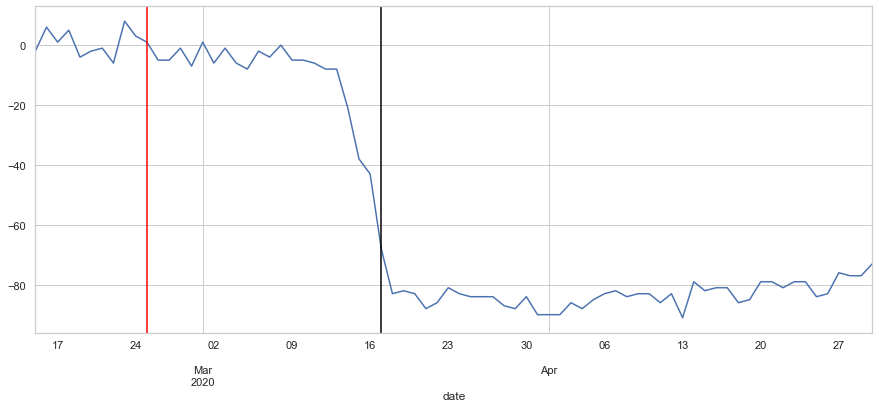

In [28]:
df_FR['Retail_and_Recreation'].plot(figsize=(15,6))
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-02-25'), color='red')

### Analyse des séries chronologiques par les provinces sur la mobilité: le commerce de détail et les loisirs

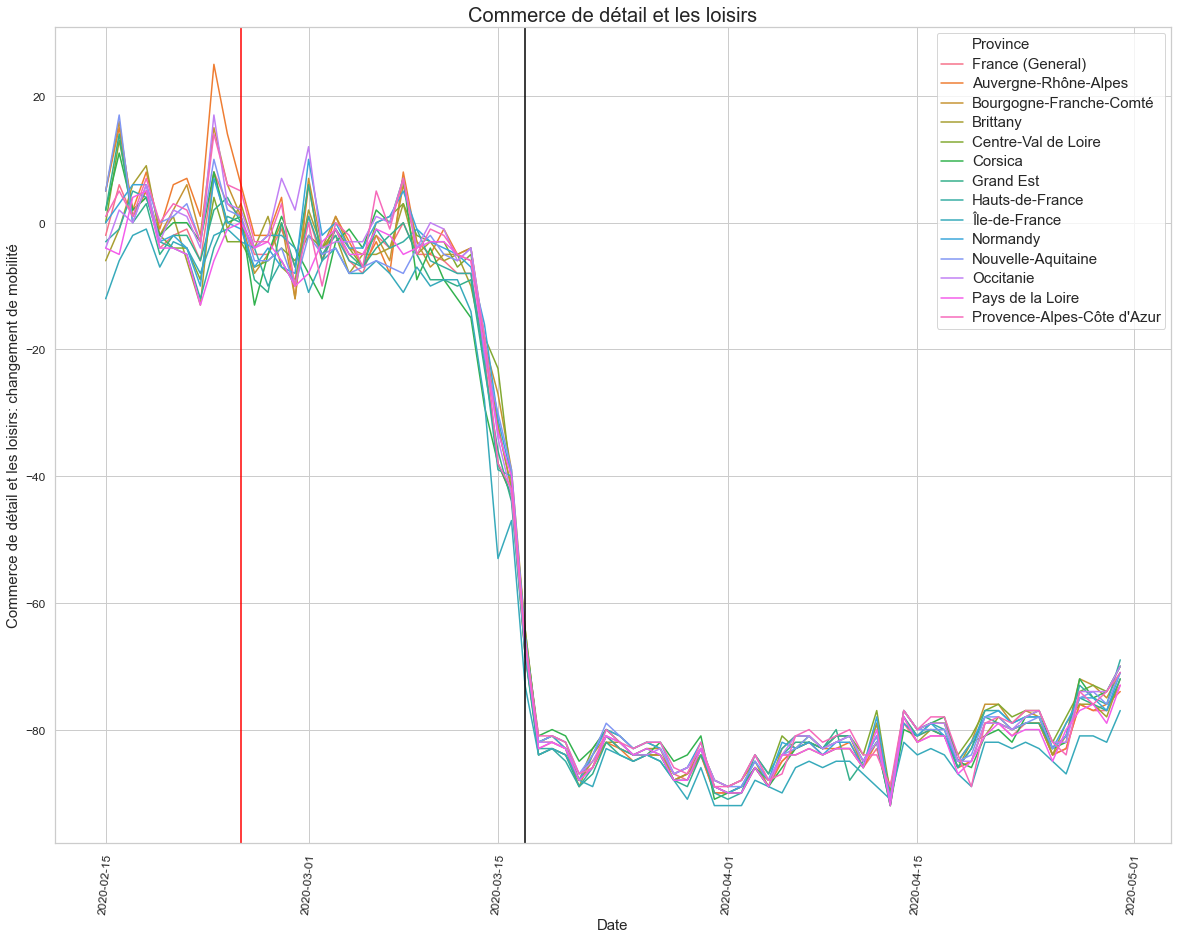

In [24]:
plt.figure(figsize=(20,15))
RR=sns.lineplot(x="Date", y="Retail_and_Recreation", hue='Province', data=df)
sns.set(style="whitegrid")
RR.axes.set_title("Commerce de détail et les loisirs",fontsize=20)
RR.set_xlabel("Date",fontsize=15)
RR.set_ylabel("Commerce de détail et les loisirs: changement de mobilité",fontsize=15)
RR.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(RR.get_legend().get_texts(), fontsize='15')
plt.setp(RR.get_legend().get_title(), fontsize='15') 
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-02-25'), color='red')

![title](https://www.pharmacie.lu/wp-content/uploads/2017/03/header-small-pharmacies.jpg)

# Épicerie et pharmacie

Tendances de mobilité pour des endroits comme les marchés d'épicerie, les entrepôts alimentaires, les marchés de producteurs, les magasins d'alimentation spécialisés, les pharmacies et les pharmacies.

### Analyse pour toute la France

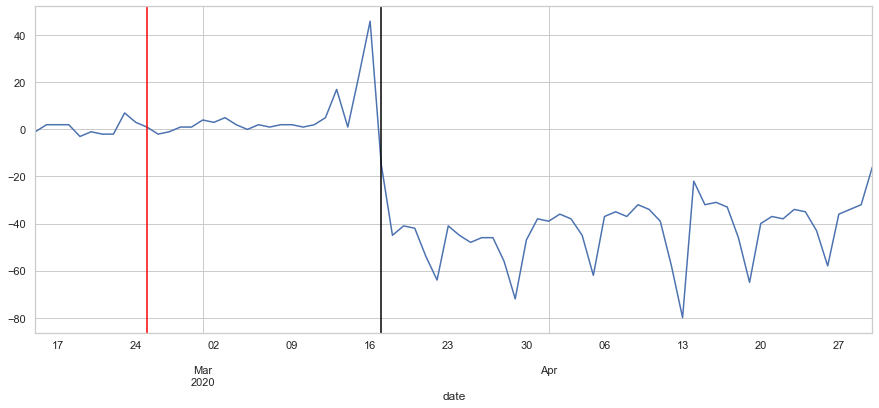

In [29]:
df_FR['Grocery_and_Pharmacy'].plot(figsize=(15,6))
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-02-25'), color='red')

## Analyse des séries chronologiques par les provinces sur la mobilité: Épiceries et pharmacies

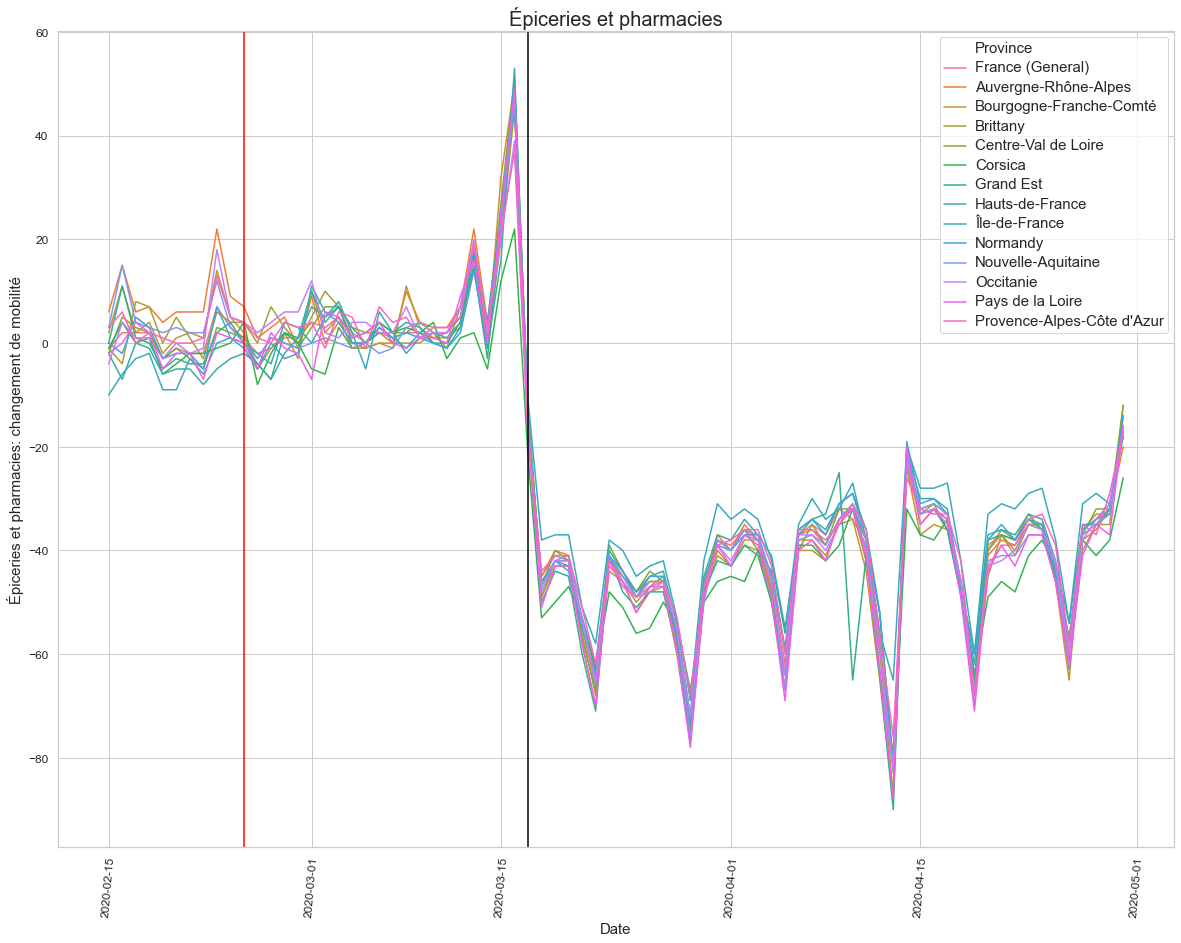

In [33]:
plt.figure(figsize=(20,15))
RR=sns.lineplot(x="Date", y="Grocery_and_Pharmacy", hue='Province', data=df)
sns.set(style="whitegrid")
RR.axes.set_title("Épiceries et pharmacies",fontsize=20)
RR.set_xlabel("Date",fontsize=15)
RR.set_ylabel("Épiceries et pharmacies: changement de mobilité",fontsize=15)
RR.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(RR.get_legend().get_texts(), fontsize='15')
plt.setp(RR.get_legend().get_title(), fontsize='15') 
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-02-25'), color='red')

![title](https://ufe-perou.com/wp-content/uploads/2018/06/ufe-perou-cat-jardins-parcs-big.jpg)

# Parcs

Tendances de mobilité pour des endroits comme les parcs locaux, les parcs nationaux, les plages publiques, les marinas, les parcs à chiens, les places et les jardins publics.

### Analyse pour toute la France

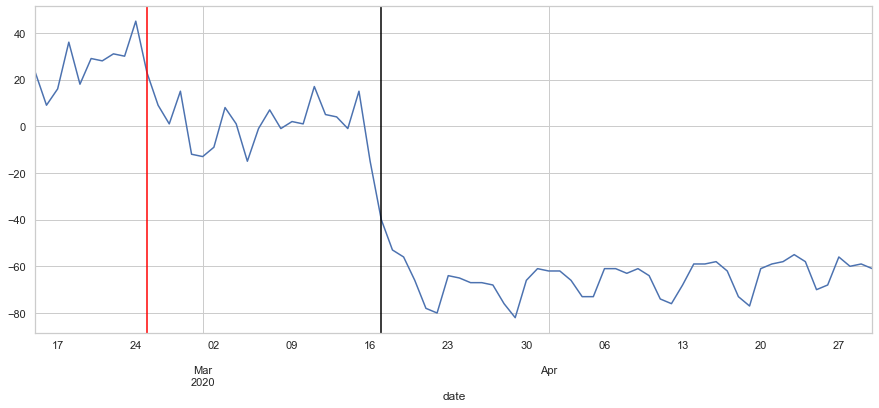

In [34]:
df_FR['Parks'].plot(figsize=(15,6))
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-02-25'), color='red')

### Analyse des séries chronologiques par les provinces sur la mobilité: Parcs

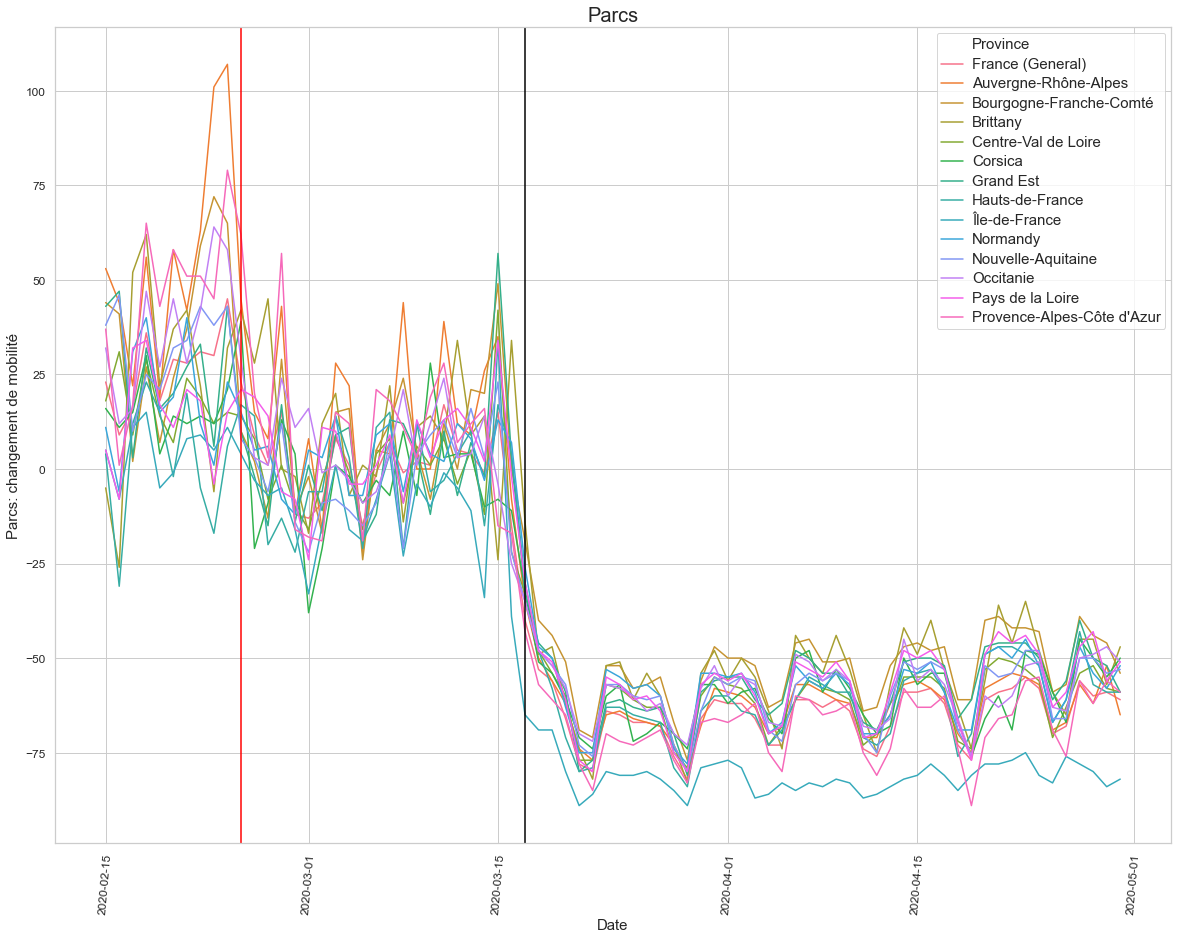

In [35]:
plt.figure(figsize=(20,15))
P=sns.lineplot(x="Date", y="Parks", hue='Province', data=df)
sns.set(style="whitegrid")
P.axes.set_title("Parcs",fontsize=20)
P.set_xlabel("Date",fontsize=15)
P.set_ylabel("Parcs: changement de mobilité",fontsize=15)
P.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(P.get_legend().get_texts(), fontsize='15')
plt.setp(P.get_legend().get_title(), fontsize='15') 
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-02-25'), color='red')

![title](https://www.renfe-sncf.com/es-es/PublishingImages/imagenes-interiores/wifi/inoui_landing_header.jpg)

# Stations de transport

Tendances de mobilité pour des endroits comme les plaques tournantes des transports publics tels que les stations de métro, de bus et de train.

### Analyse pour toute la France

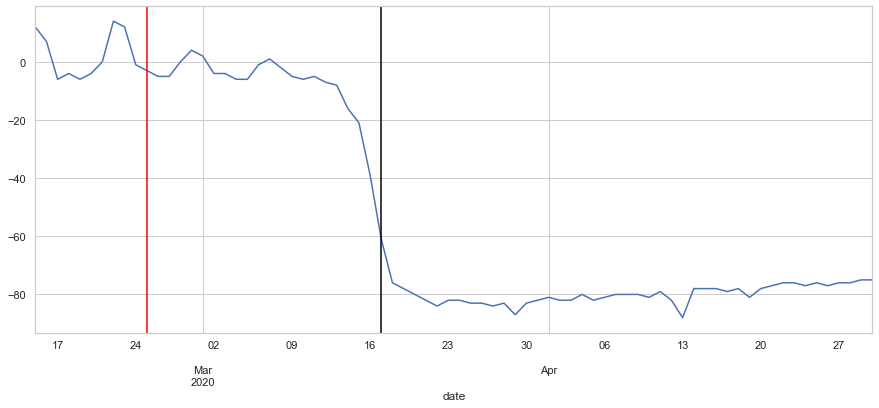

In [37]:
df_FR['Transit_Stations'].plot(figsize=(15,6))
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-02-25'), color='red')

### Analyse des séries chronologiques par les provinces sur la mobilité: Stations de transport

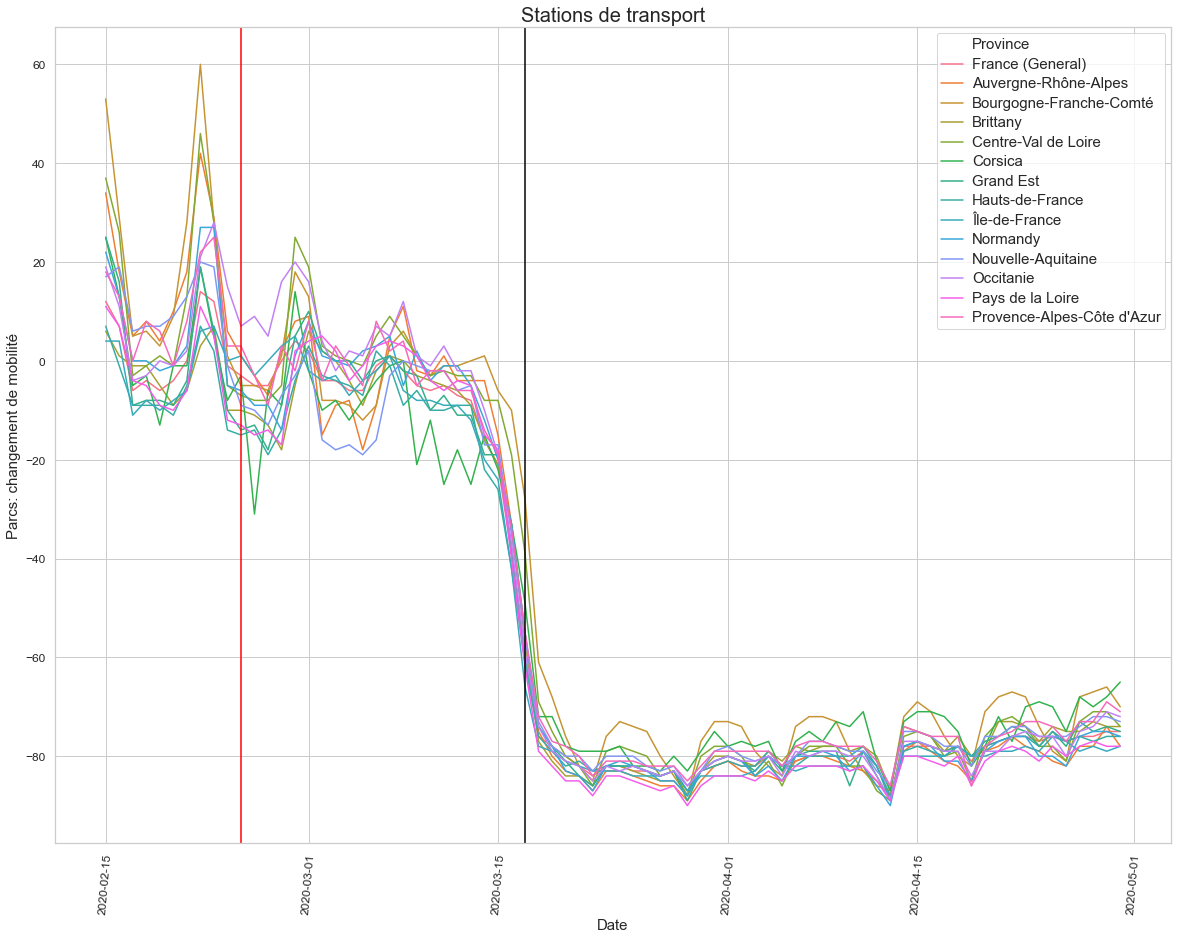

In [38]:
plt.figure(figsize=(20,15))
T=sns.lineplot(x="Date", y="Transit_Stations", hue='Province', data=df)
sns.set(style="whitegrid")
T.axes.set_title("Stations de transport",fontsize=20)
T.set_xlabel("Date",fontsize=15)
T.set_ylabel("Parcs: changement de mobilité",fontsize=15)
T.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(T.get_legend().get_texts(), fontsize='15')
plt.setp(T.get_legend().get_title(), fontsize='15') 
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-02-25'), color='red')

![title](https://www.cdc.gov/flu/images/business/flu-business-header.jpg)

# Lieux de travail

Tendance de la mobilité pour les lieux de travail 

### Analyse pour toute la France

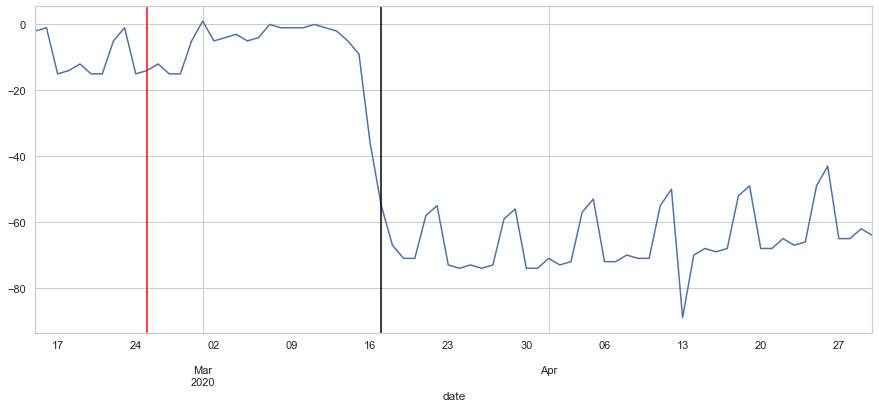

In [39]:
df_FR['Workplaces'].plot(figsize=(15,6))
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-02-25'), color='red')

### Analyse des séries chronologiques par les provinces sur la mobilité: Lieux de travail

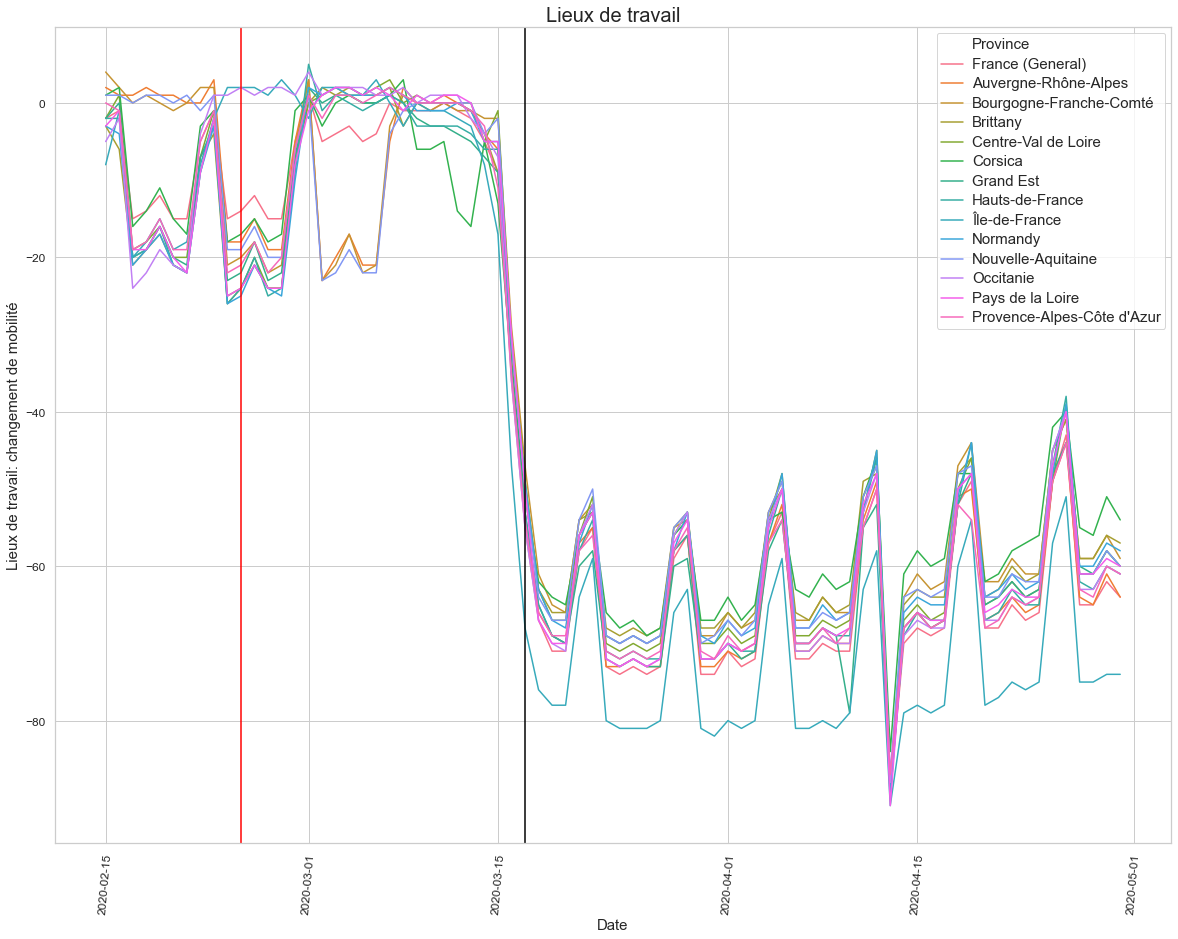

In [40]:
plt.figure(figsize=(20,15))
W=sns.lineplot(x="Date", y="Workplaces", hue='Province', data=df)
sns.set(style="whitegrid")
W.axes.set_title("Lieux de travail",fontsize=20)
W.set_xlabel("Date",fontsize=15)
W.set_ylabel("Lieux de travail: changement de mobilité",fontsize=15)
W.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(W.get_legend().get_texts(), fontsize='15')
plt.setp(W.get_legend().get_title(), fontsize='15') 
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-02-25'), color='red')

![title](https://www.maisonlaudiere.com/s/img/emotionheader.jpg)

# Résidences

Tendances de mobilité pour les lieux de résidence.

### Analyse pour toute la France

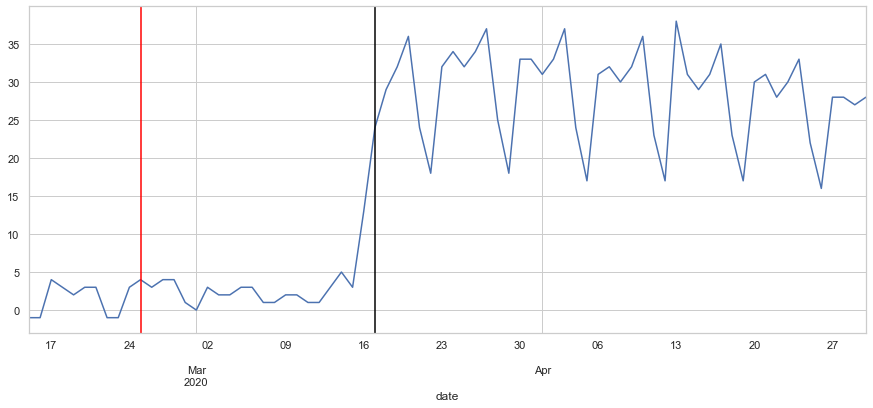

In [43]:
df_FR['Residences'].plot(figsize=(15,6))
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-02-25'), color='red')

### Analyse des séries chronologiques par les provinces sur la mobilité: Résidences

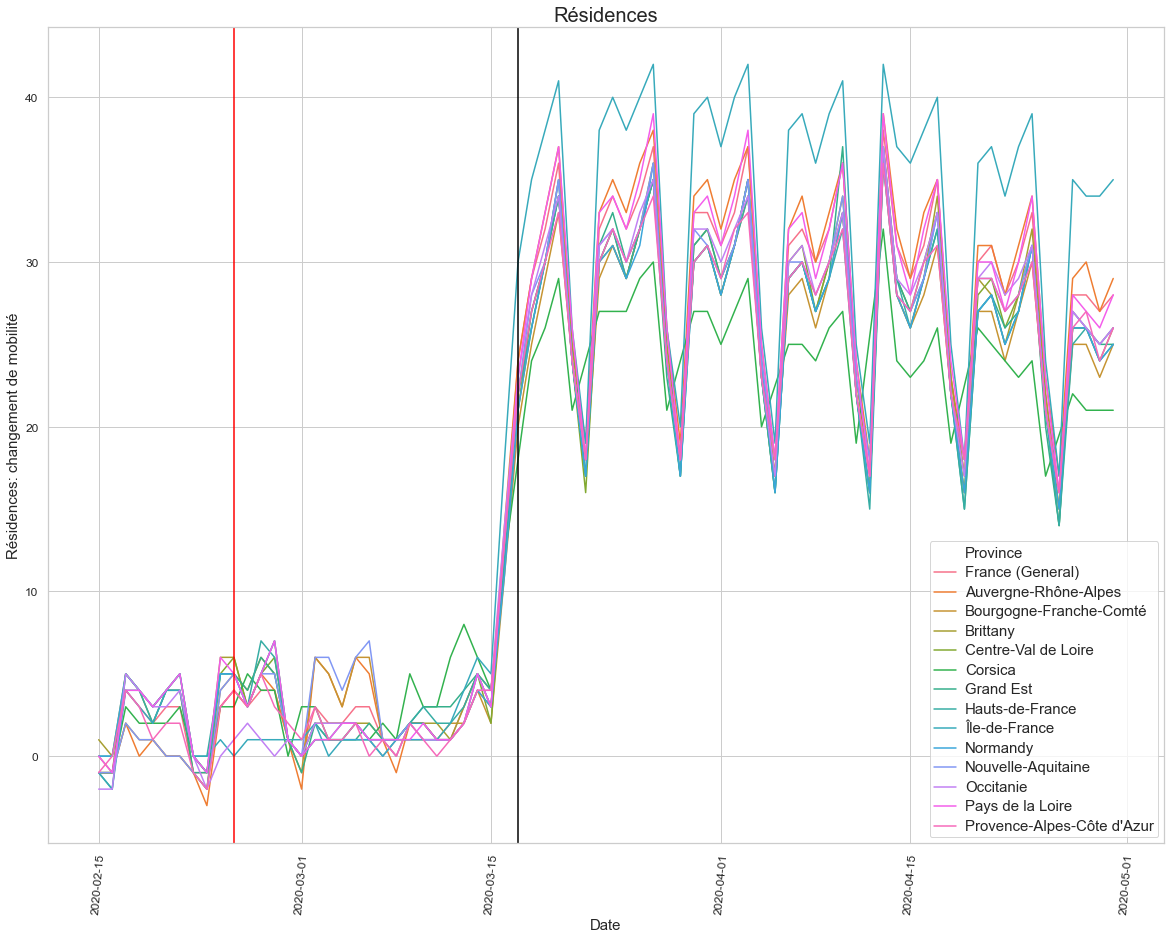

In [44]:
plt.figure(figsize=(20,15))
R=sns.lineplot(x="Date", y="Residences", hue='Province', data=df)
sns.set(style="whitegrid")
R.axes.set_title("Résidences",fontsize=20)
R.set_xlabel("Date",fontsize=15)
R.set_ylabel("Résidences: changement de mobilité",fontsize=15)
R.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(R.get_legend().get_texts(), fontsize='15')
plt.setp(R.get_legend().get_title(), fontsize='15') 
plt.axvline(pd.Timestamp('2020-03-17'), color='black')
plt.axvline(pd.Timestamp('2020-02-25'), color='red')

## 👍👍 <center> <a href="https://www.linkedin.com/in/lealrlx/">Partagez vos idées et vos commentaires, écrivez-moi 🌍 </a> </center>##